In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "Ayb_Comp.xlsx"
sheet_name = 'data'
data = pd.read_excel("Ayb_Comp.xlsx", sheet_name="Sheet1")

def distribution_plot_wrt_target(data, feature, target):
    plt.figure(figsize=(10, 6))

    
    sns.histplot(data=data, x=feature, hue=target, multiple="stack", kde=True)

    
    plt.title(f'Distribution of {feature} with respect to {target}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.show()

def bar_chart_by_attrition(feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue="Attrition_Flag")
    plt.title(f'{feature} by Attrition Flag')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Attrition Flag')
    plt.xticks(rotation=45)
    plt.show()

def dist_plot_by_attrition(feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue="Attrition_Flag", multiple="stack", kde=True)
    plt.title(f'Distribution of {feature} by Attrition Flag')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()



PRE PROCCESSING

In [2]:
column_name = 'Age'  
column_data = data[column_name]


Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)

# Calculate IQR
IQR = Q3 - Q1

print(IQR )
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)

Q1 (25th percentile): 40.0
Q3 (75th percentile): 52.0
12.0
70.0
22.0


In [3]:
data['Age'] = data['Age'].clip(lower=22, upper=70)

print(data['Age'].head())


0    45
1    58
2    46
3    34
4    49
Name: Age, dtype: int64


In [18]:

data['Gender'] = data['Gender'].fillna('F')


data['Income_Category']=data['Income_Category'].fillna('Less than $40K')

data['Card_Category']=data['Card_Category'].fillna('Blue')

data = data.dropna(subset=['Attrition_Flag'])

CATEGORIZATION

In [20]:
# 1. Age Group
age_bins = [22, 30, 40, 50, 60, 70]
age_labels = ['22-30', '30-40', '40-50', '50-60', '60-70']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# 2. Credit Limit Category
credit_bins = [0, 6903.2, 13806.4, 20709.6, 27612.8, 34516]
credit_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
data['Credit_Limit_Category'] = pd.cut(data['Credit_Limit'], bins=credit_bins, labels=credit_labels, include_lowest=True)

# 3. Total Trans Amt
trans_amt_bins = [0, 1500, 3000, 6000, 10000, 20000]
trans_amt_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
data['Transaction_Level'] = pd.cut(data['Total_Trans_Amt'], bins=trans_amt_bins, labels=trans_amt_labels, include_lowest=True)

In [21]:
print(data)

       Customer_Number     Attrition_Flag  Age Date_of_birth Gender  \
0           3708092208  Existing Customer  NaN    1979-06-09      F   
1           3708093408  Attrited Customer  NaN    1966-05-28      M   
2           3708094683  Attrited Customer  NaN    1978-06-29      M   
3           3708095583  Existing Customer  NaN    1990-06-23      F   
4           3708097083  Existing Customer  NaN    1975-03-12      F   
...                ...                ...  ...           ...    ...   
11720       3828298458  Existing Customer  NaN    1974-03-29      M   
11721       3828301983  Attrited Customer  NaN    1986-05-15      M   
11722       3828305058  Attrited Customer  NaN    1975-02-17      F   
11723       3828309033  Existing Customer  NaN    1970-03-04      M   
11724       3828353208  Existing Customer  NaN    1981-07-26      F   

       Dependent_count Education_Level Marital_Status Income_Category  \
0                    3     High School        Married  Less than $40K   
1

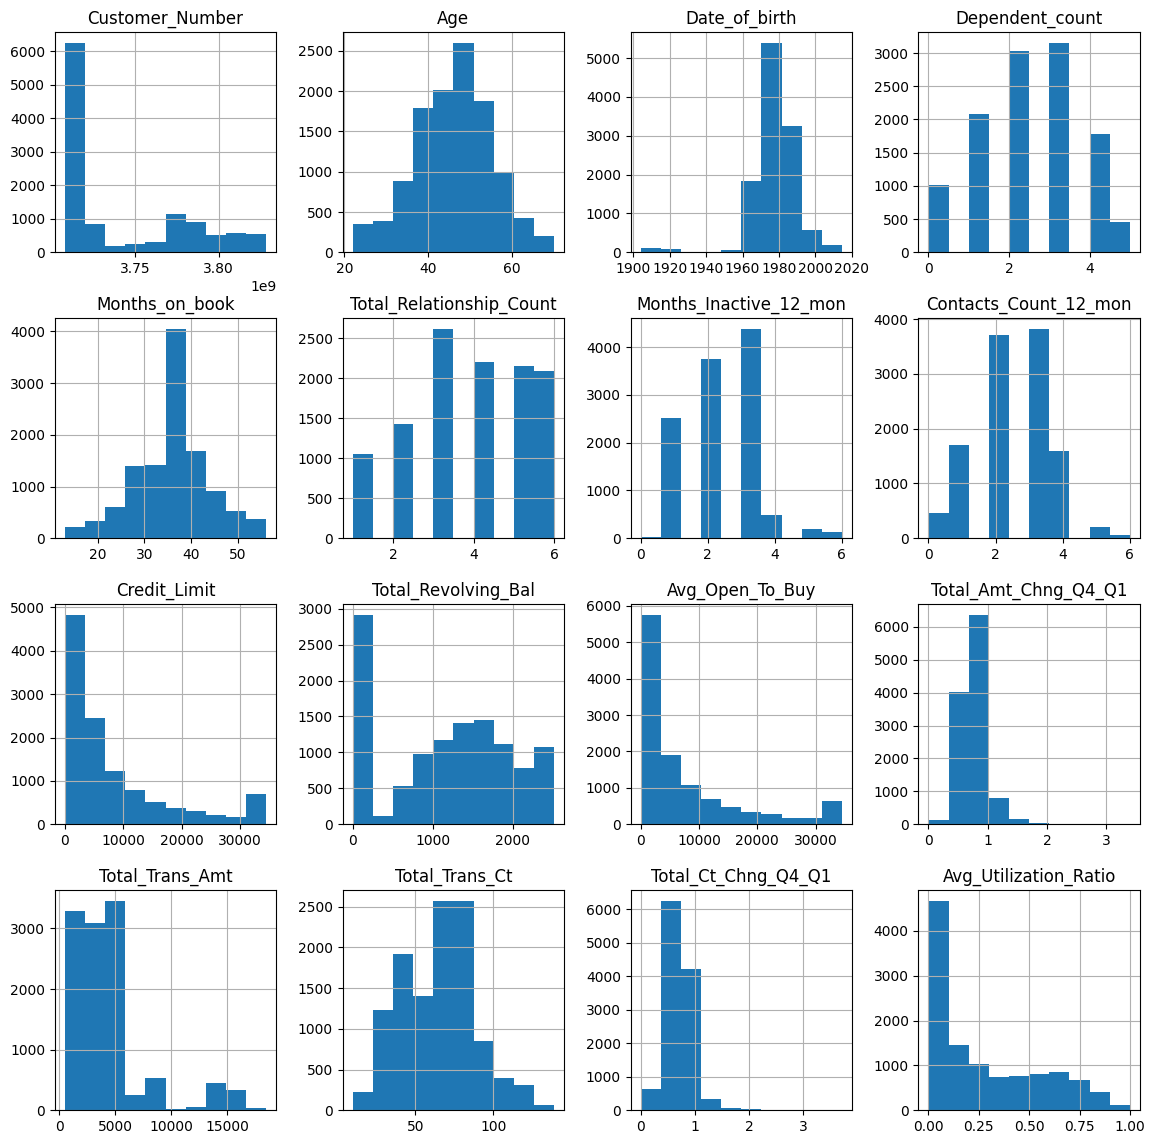

In [6]:
data.hist(figsize=(14, 14))
plt.show()

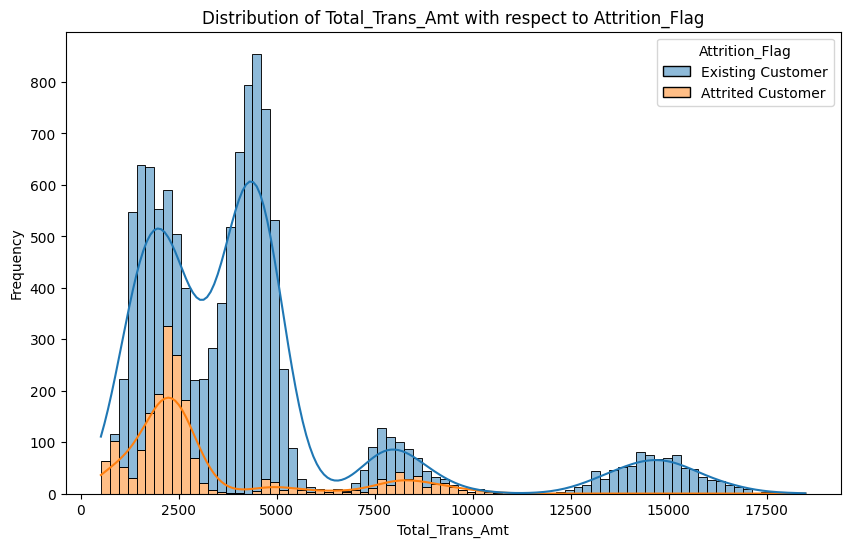

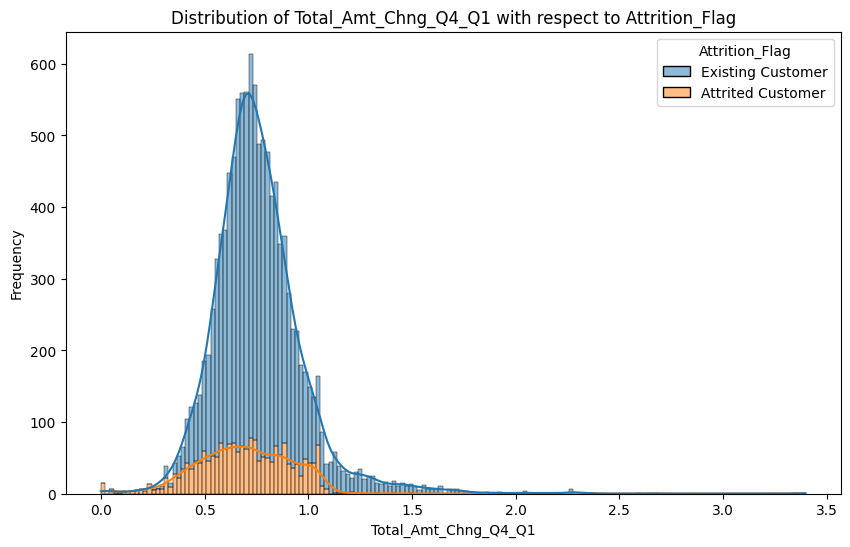

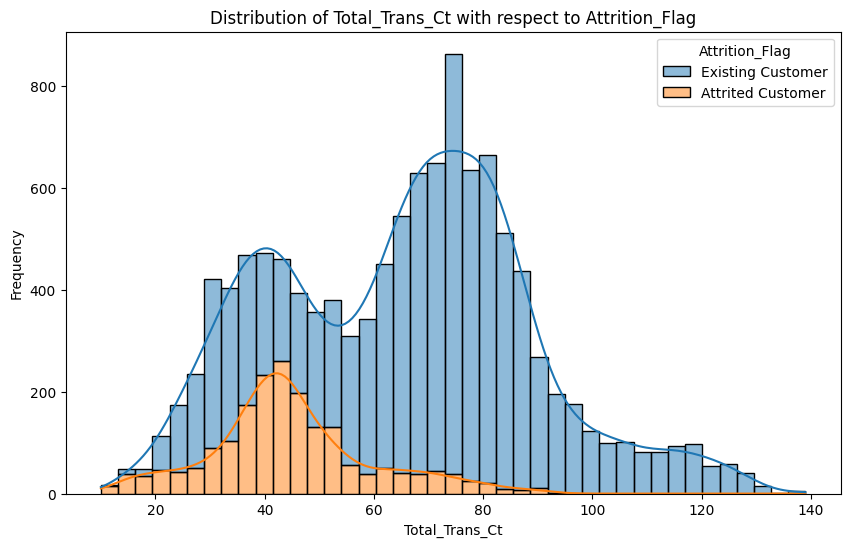

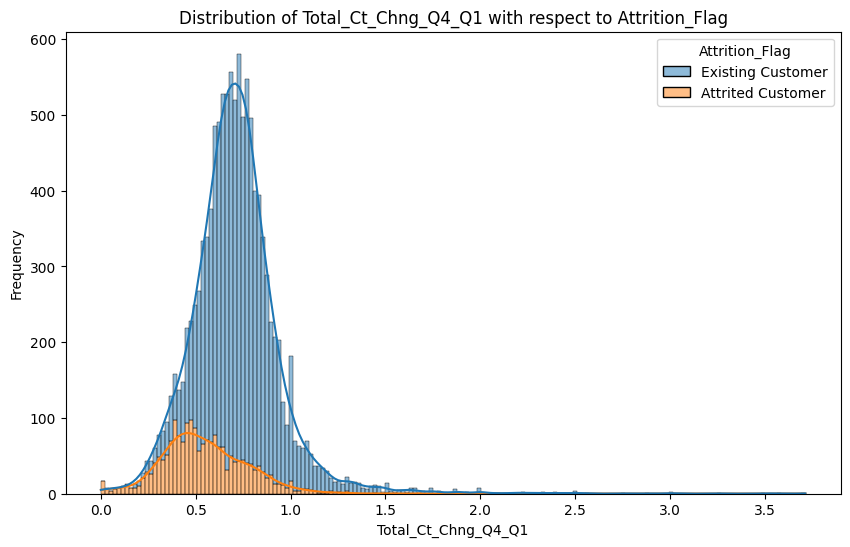

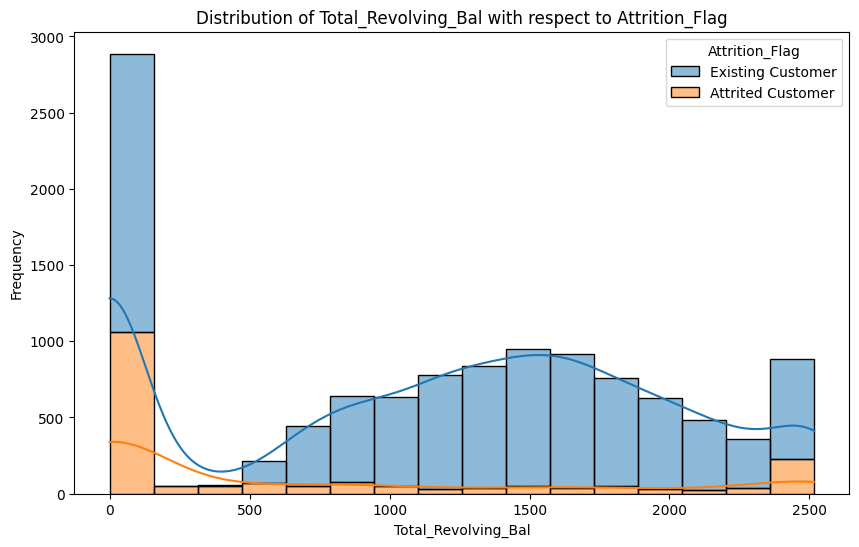

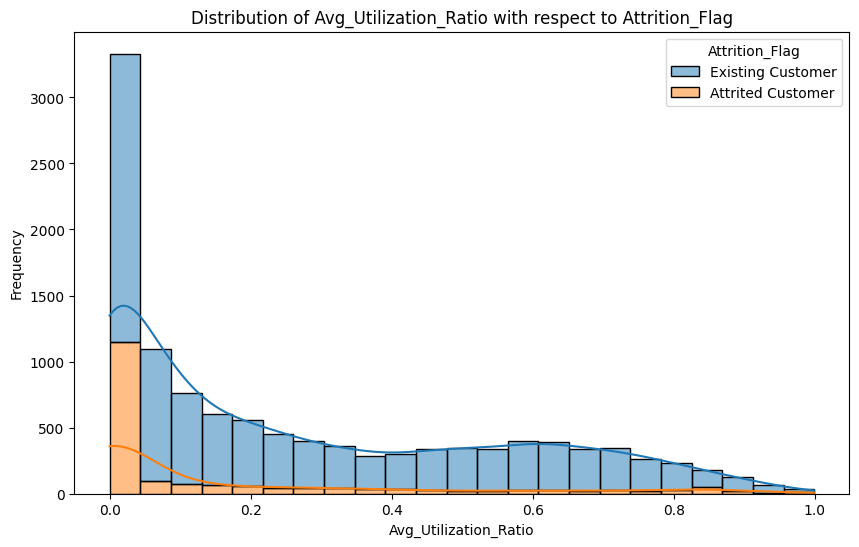

In [7]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")




MODEL

Accuracy: 96.66%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1939
           1       0.93      0.86      0.89       366

    accuracy                           0.97      2305
   macro avg       0.95      0.92      0.94      2305
weighted avg       0.97      0.97      0.97      2305


Confusion Matrix:


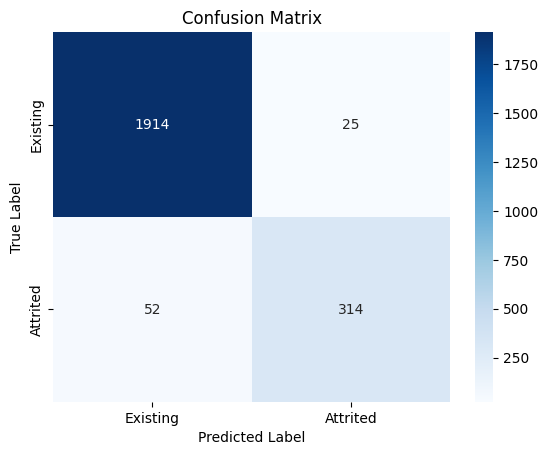

In [8]:

features = ['Total_Trans_Amt','Total_Amt_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio',
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']
X = data[features]  
y = data['Attrition_Flag']  


y = y.map({'Existing Customer': 0, 'Attrited Customer': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Existing', 'Attrited'],
            yticklabels=['Existing', 'Attrited'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


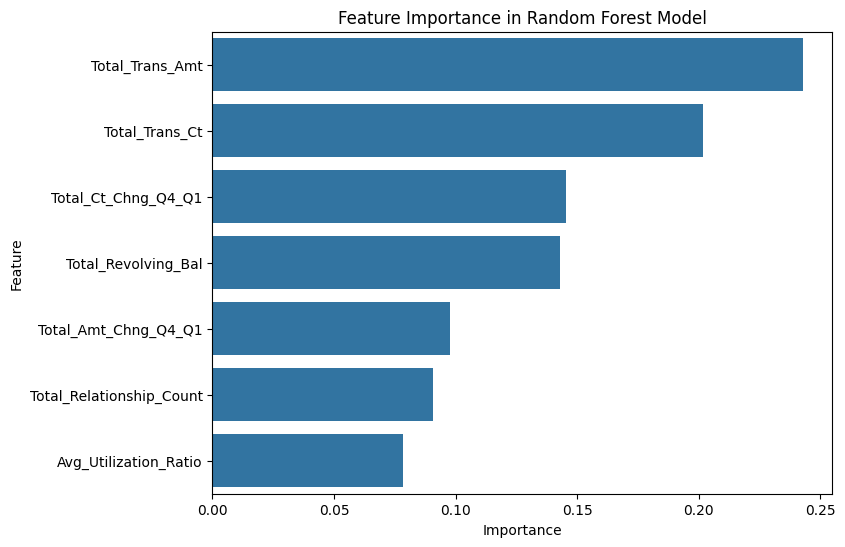

In [9]:
importances = rf_model.feature_importances_
feature_names = features

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [10]:

churn_probabilities = rf_model.predict_proba(X)[:, 1]  


existing_customers = X.copy()
existing_customers['Churn_Probability'] = churn_probabilities
existing_customers['Actual_Status'] = y  

existing_customers['Customer_Number'] = data.loc[existing_customers.index, 'Customer_Number']

existing_customers = existing_customers[existing_customers['Actual_Status'] == 0]


def categorize_risk(prob):
    if prob <= 0.2:
        return 'No Risk'
    elif prob <= 0.4:
        return 'Low Risk'
    elif prob <= 0.6:
        return 'Medium Risk'
    elif prob <= 0.8:
        return 'High Risk'
    else:
        return 'Very High Risk'

existing_customers['Risk_Level'] = existing_customers['Churn_Probability'].apply(categorize_risk)

existing_customers_sorted = existing_customers.sort_values(by='Churn_Probability', ascending=False)


print("List of existing customers with their churn risk level:")
print(existing_customers_sorted[['Customer_Number', 'Churn_Probability', 'Risk_Level']])



List of existing customers with their churn risk level:
       Customer_Number  Churn_Probability      Risk_Level
1621        3711301683               0.94  Very High Risk
10787       3809352333               0.93  Very High Risk
956         3709996758               0.92  Very High Risk
4663        3716811033               0.91  Very High Risk
4469        3716446608               0.84  Very High Risk
...                ...                ...             ...
11707       3827963808               0.00         No Risk
2984        3713749008               0.00         No Risk
11705       3827914308               0.00         No Risk
11704       3827911308               0.00         No Risk
24          3708147033               0.00         No Risk

[9600 rows x 3 columns]


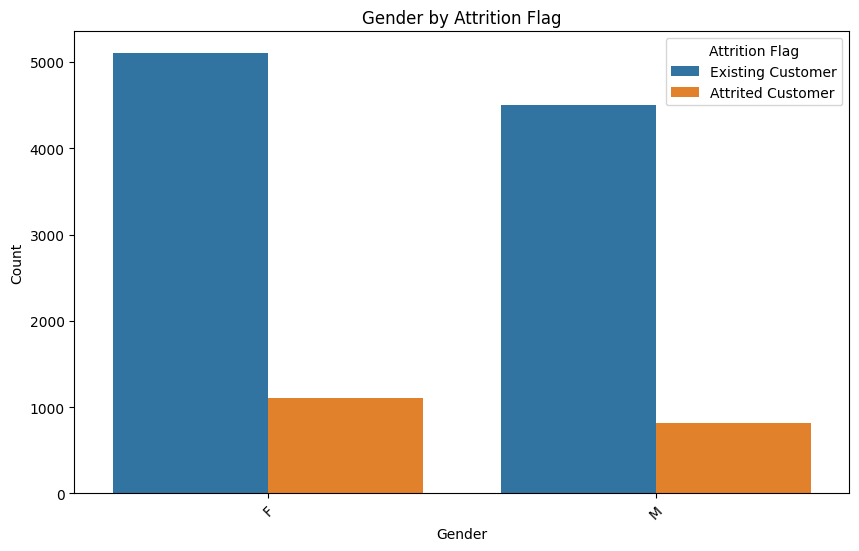

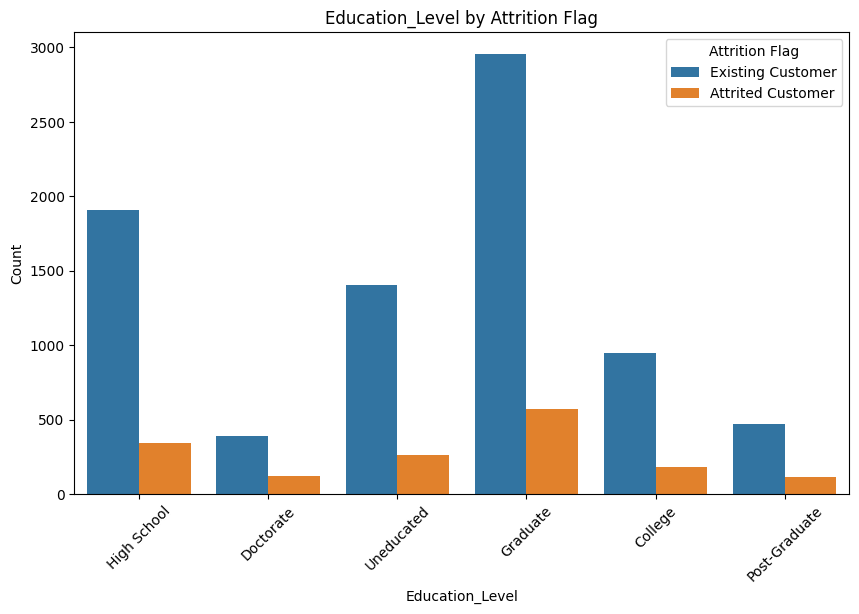

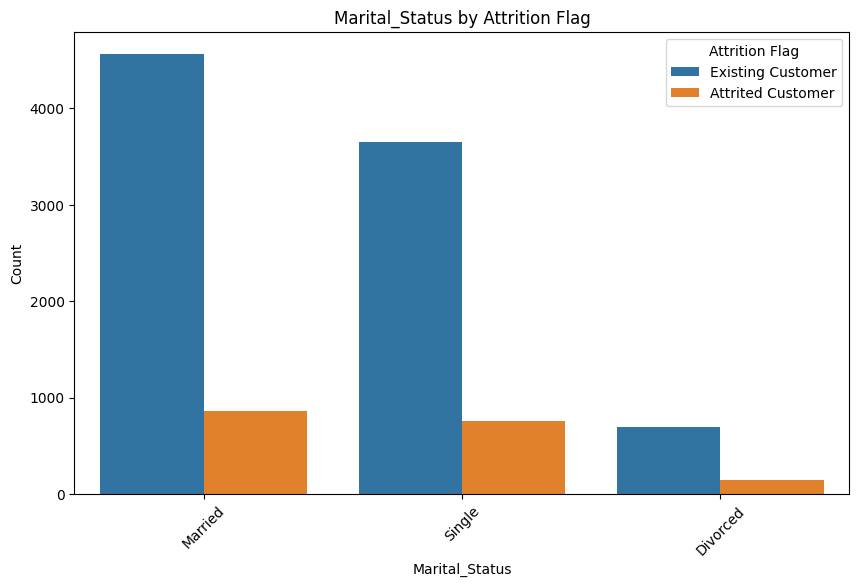

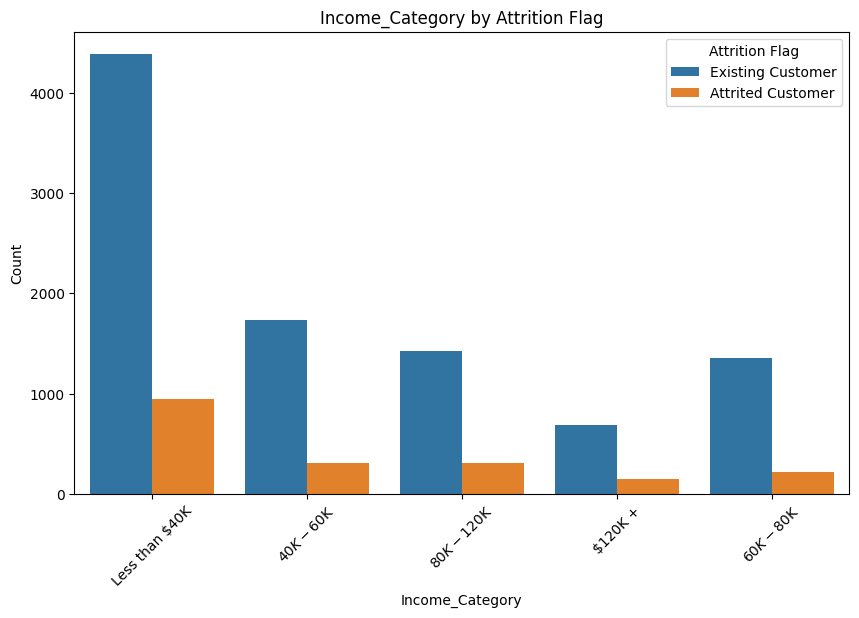

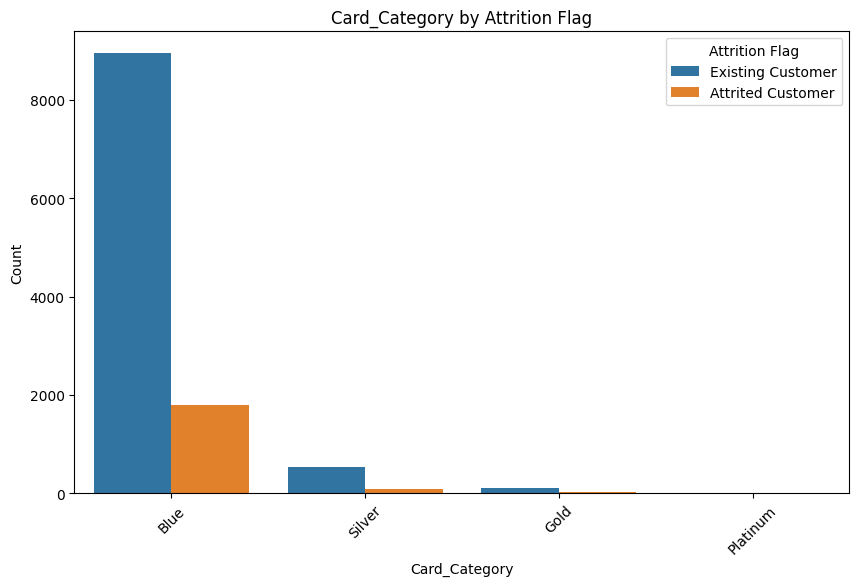

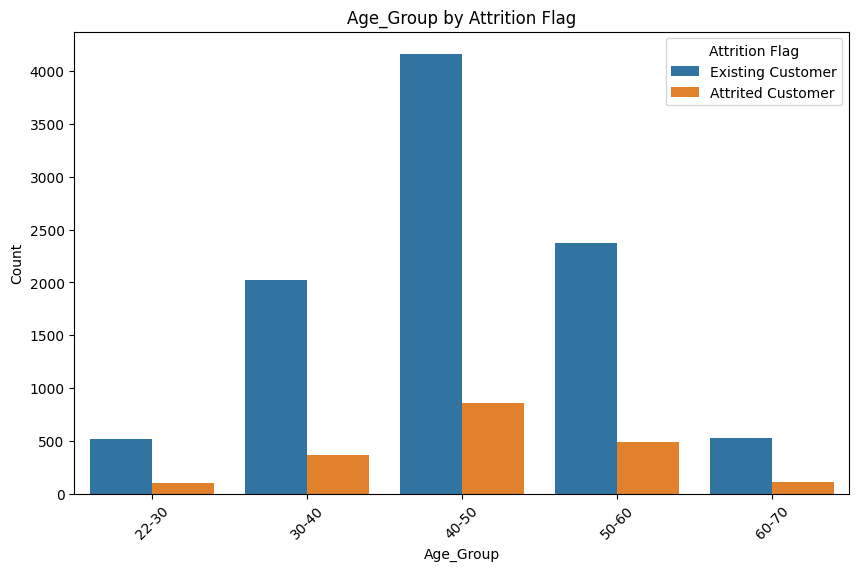

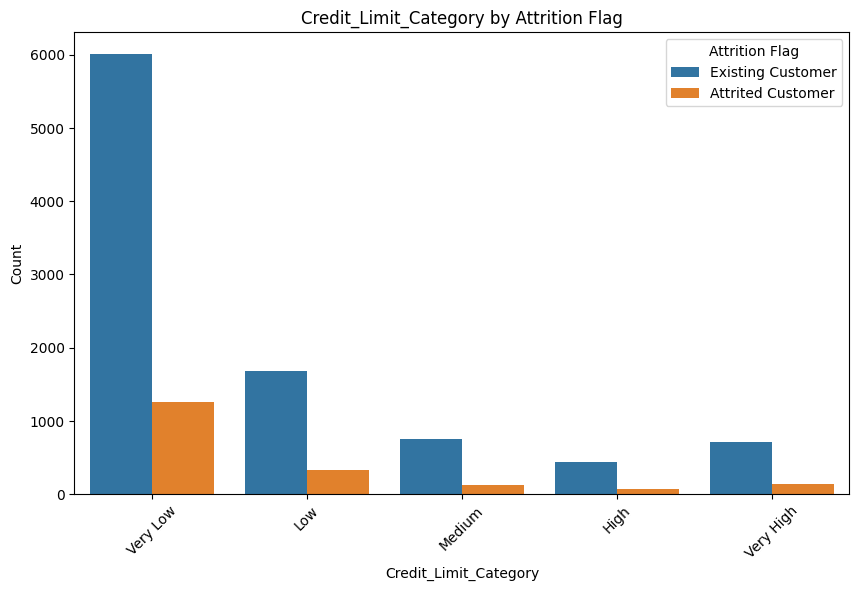

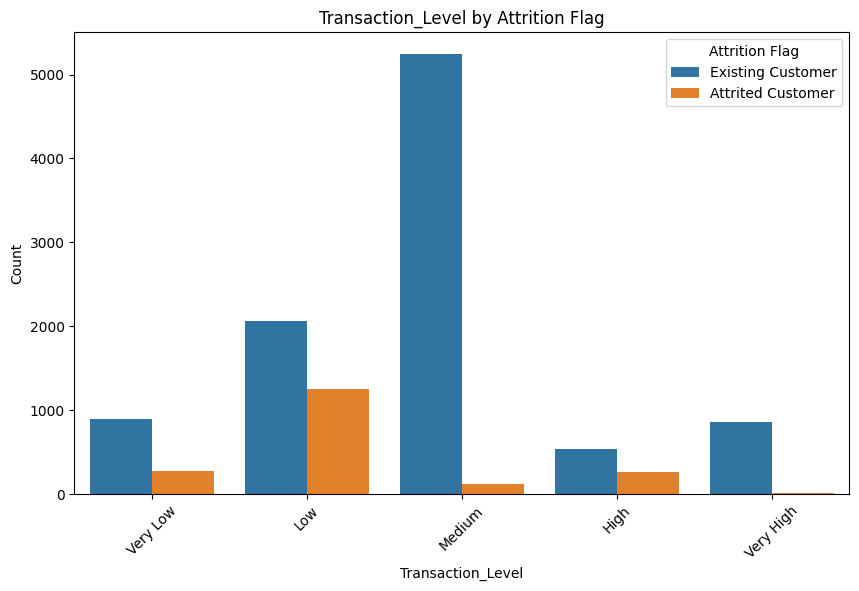

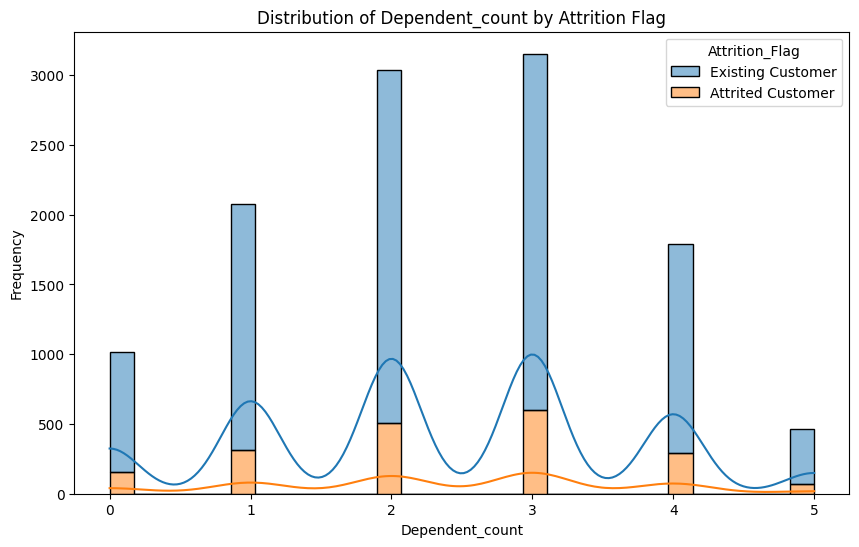

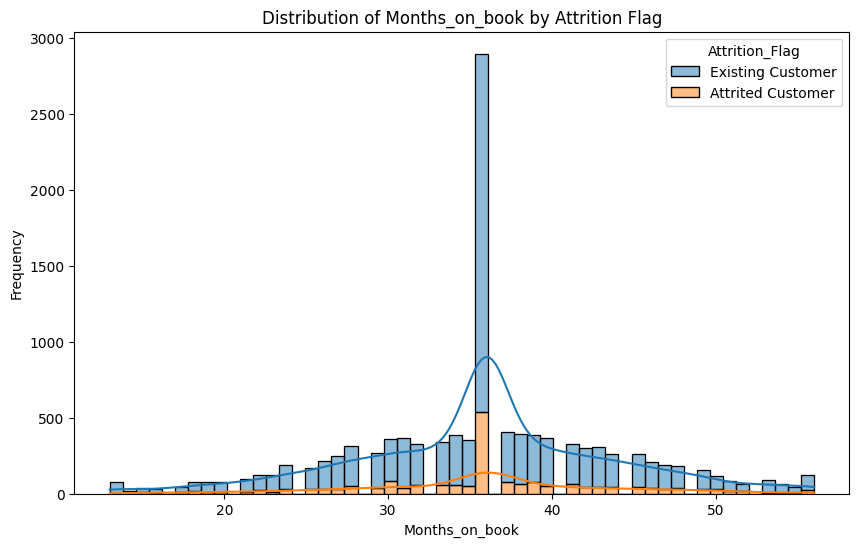

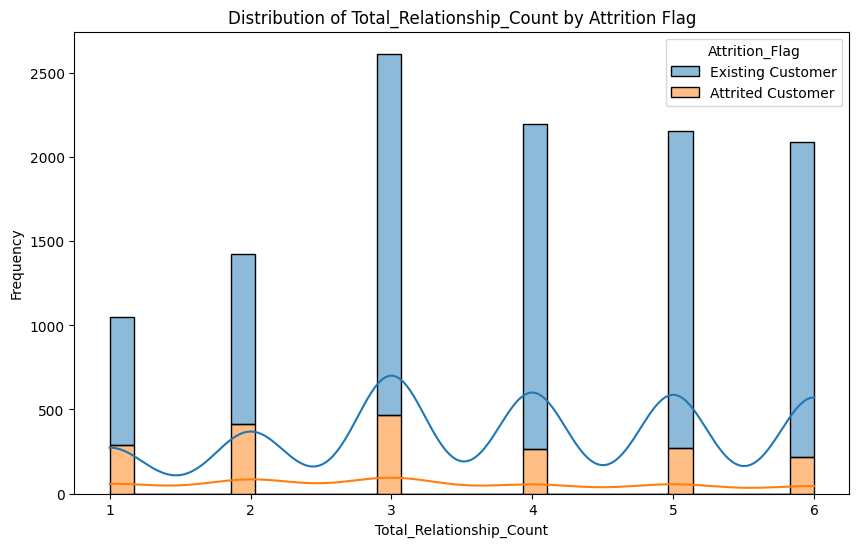

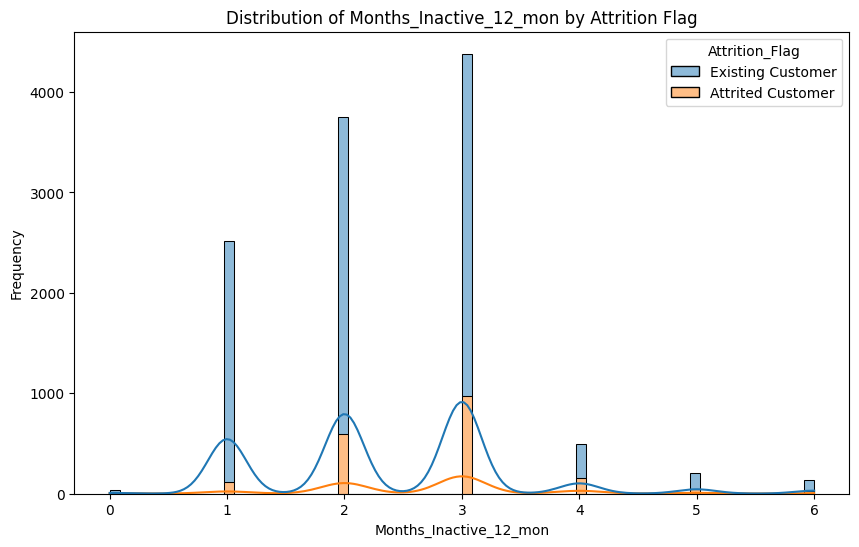

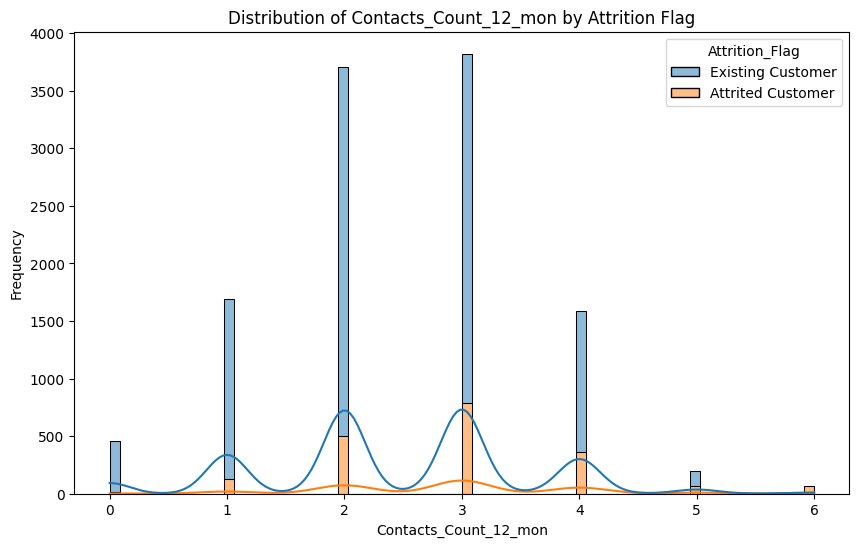

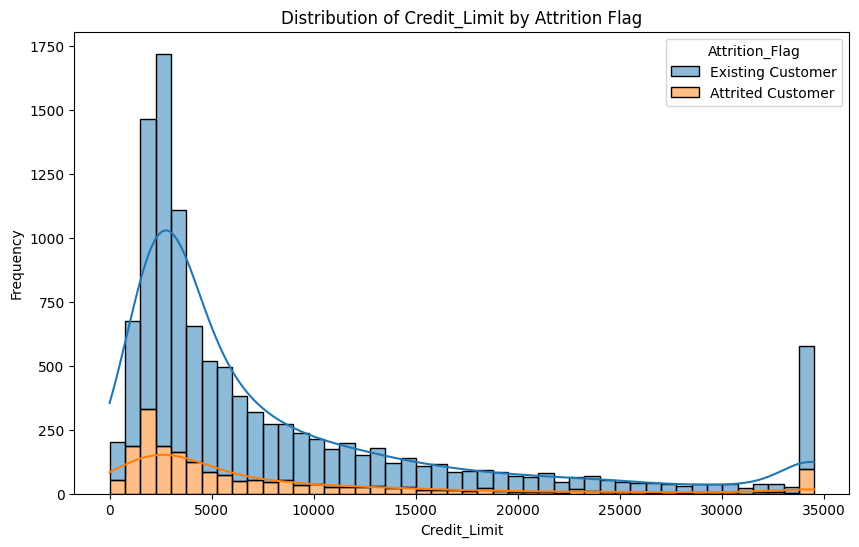

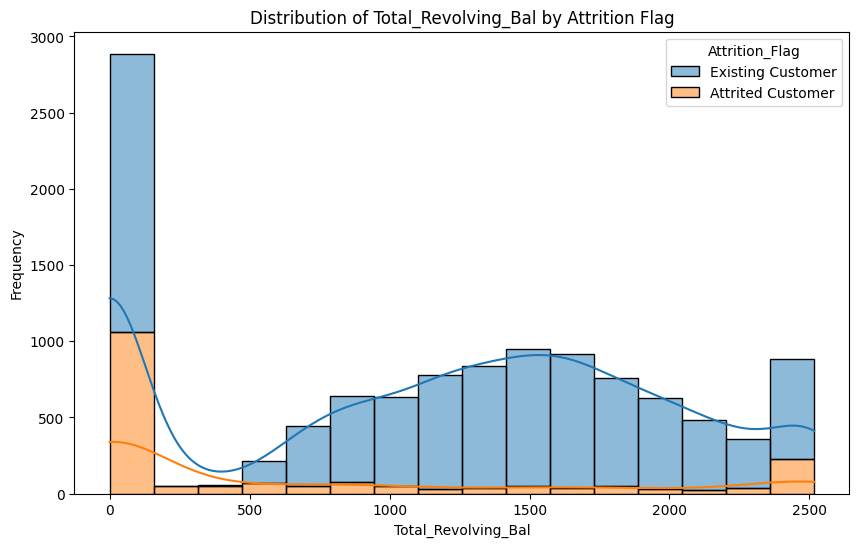

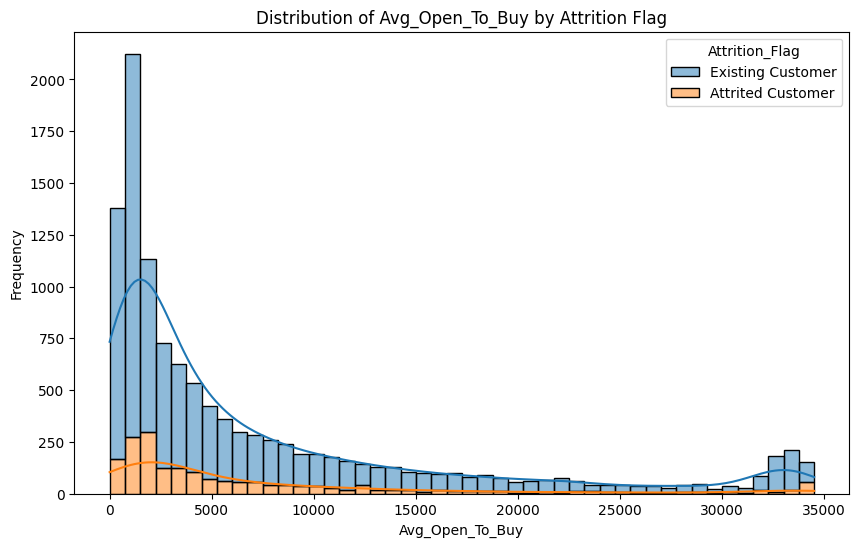

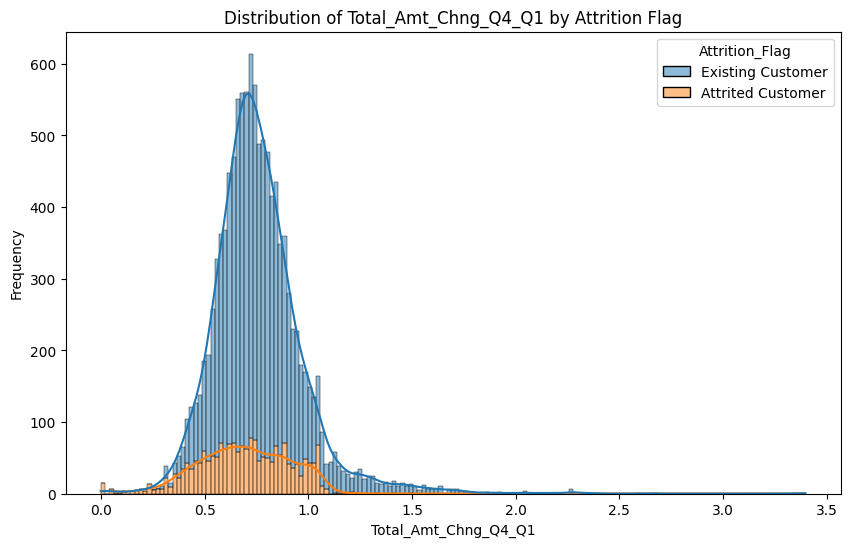

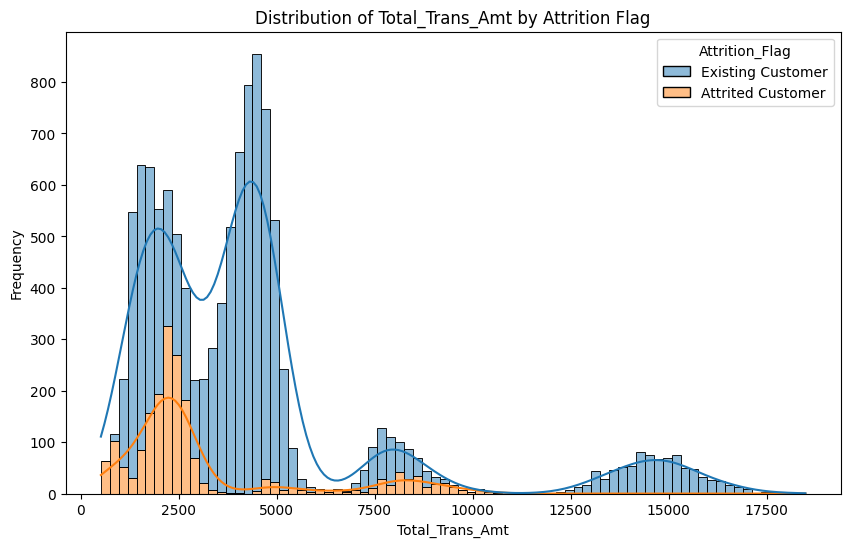

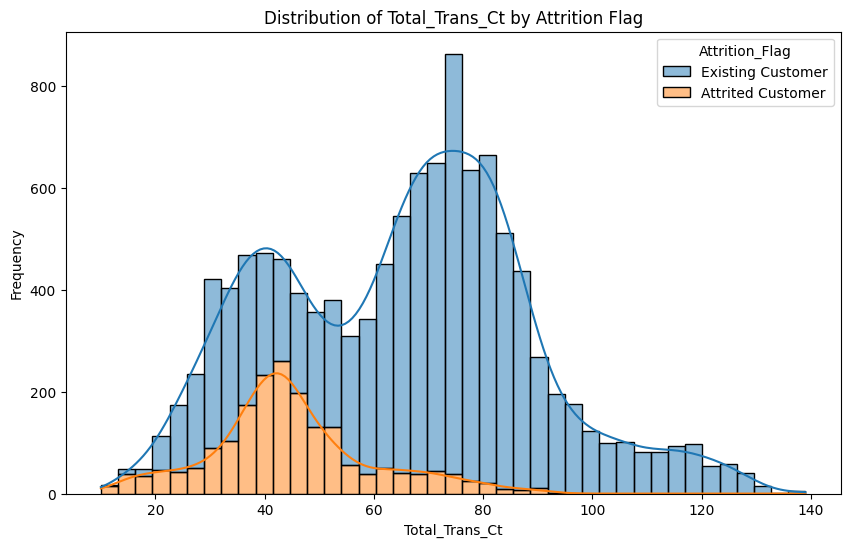

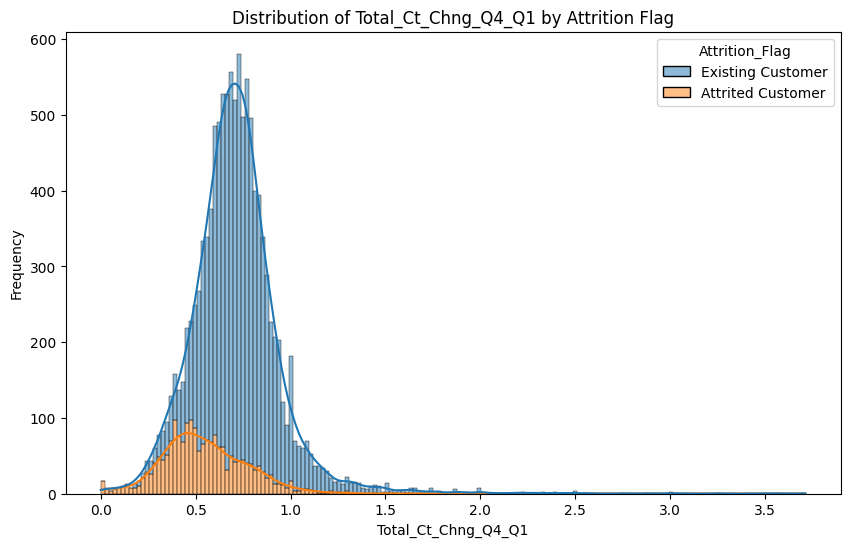

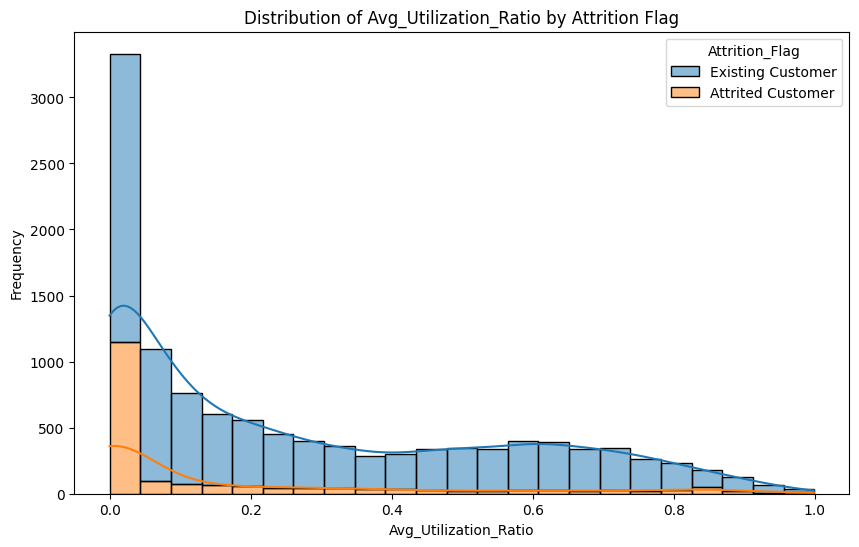

In [14]:

categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 
                        'Card_Category', 'Age_Group', 'Credit_Limit_Category', 'Transaction_Level']

numerical_features = ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
                      'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
                      'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


for feature in categorical_features:
    bar_chart_by_attrition(feature)


for feature in numerical_features:
    dist_plot_by_attrition(feature)